<a href="https://colab.research.google.com/github/Dannap77/Talento-tech/blob/Talento-tec/Analisis_sensibilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install googletrans==4.0.0-rc1

In [4]:
import pandas as pd
from textblob import TextBlob
from googletrans import Translator

In [5]:
def translateComment(strComment: str):
    translator = Translator()
    strEngComment = translator.translate(strComment, src="es", dest="en")
    return strEngComment.text

def getPolarity(strComment: str):
    strComment = translateComment(strComment)
    analysis = TextBlob(strComment)
    return analysis.sentiment.polarity

# Cargamos el dataset
df = pd.read_csv('/content/Comentarios.csv')
df['polaridad'] = df['Comentario'].apply(getPolarity)

df.to_csv('resultados.csv', index=False)

df = pd.read_csv('/content/resultados.csv')
display(df)

,Comentario,polaridad
0,La comida fue excelente y el servicio fue exce...,0.333333
1,El ambiente era agradable y la comida estaba d...,0.261458
2,"La comida estaba bien, pero el servicio fue le...",-0.012393
3,"No me gustó la comida, estaba fría y el sabor ...",-0.475000
4,El peor restaurante en el que he estado. No lo...,-1.000000
...,...,...
66,Siempre disfruto venir aquí. La comida es deli...,0.629167
67,"Buen lugar para cenar, aunque el servicio pued...",0.200000
68,"La comida está bien, pero el ambiente no es mu...",0.067308
69,No me gustó la comida y el servicio fue muy de...,-0.520000


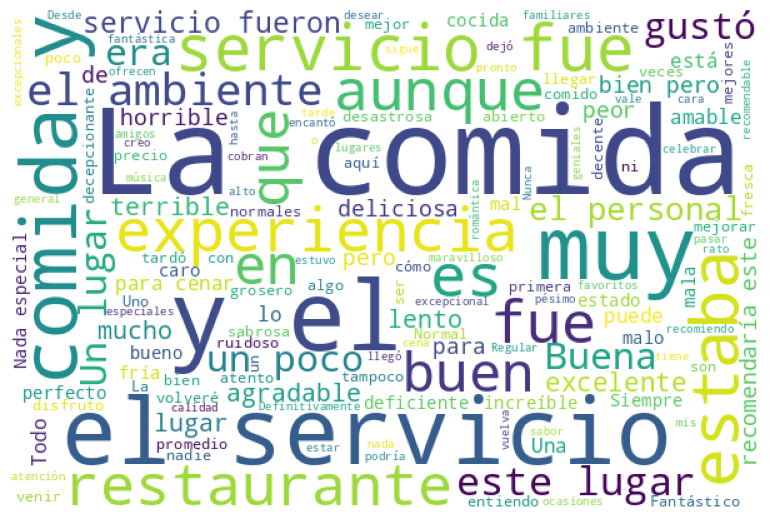

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combinar todos los comentarios en una sola cadena
text = " ".join(review for review in df.Comentario)

# Crear la nube de palabras
wordcloud = WordCloud(width=600, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()